In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
data = pd.read_csv("housing.csv")

In [3]:
data.head()

,Address,Price,Description,Place,Beds,Bath,Sq.Ft,Website
0,3704 42 St SW,979999,CA AB T3E 3N1,Glenbrook,4,3.5,1813,Century 21 Bravo Realty
1,30 Mahogany Mews SE #415,439900,CA AB T3M 3H4,Mahogany,2,2.0,1029,Century 21 Bamber Realty Ltd.
2,273 Auburn Shores Way SE,950000,CA AB T3M 2E9,Auburn Bay,4,2.5,2545,Exp Realty
3,235 15 Ave SW #404,280000,CA AB T2R 0P6,Beltline,2,2.0,898,RE/MAX Realty Professionals
4,24 Hemlock Crescent SW #2308,649000,CA AB T3C 2Z1,Spruce Cliff,2,2.0,1482,Charles


## Exploratory Data Analysis

In [4]:
data.shape

(3360, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Address      3360 non-null   object 
 1   Price        3360 non-null   int64  
 2   Description  3360 non-null   object 
 3   Place        3344 non-null   object 
 4   Beds         3360 non-null   int64  
 5   Bath         3360 non-null   float64
 6   Sq.Ft        3360 non-null   int64  
 7   Website      3359 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 210.1+ KB


In [6]:
for column in data.columns:
    print(data[column].value_counts())
    print("*"*20)

Address
3704 42 St SW               1
52 Treeline Manor SW        1
625 12 Ave NE               1
304 Rundlefield Rd NE       1
1324 Falconridge Dr NE      1
                           ..
28 Cornerbrook Common NE    1
345 Auburn Crest Way SE     1
291 Seton Rd SE             1
111 Tarawood Ln NE #206     1
1709 32 St SW               1
Name: count, Length: 3360, dtype: int64
********************
Price
749900     33
399900     31
699900     31
799900     31
549900     30
           ..
658888      1
354000      1
1178000     1
774300      1
7988000     1
Name: count, Length: 1122, dtype: int64
********************
Description
CA  AB T2G 0B5    10
CA  AB T2P 1J3    10
CA  AB T2P 3R8     8
CA  AB T2G 1E5     8
CA  AB T2X 2B9     7
                  ..
CA  AB T2B 1J5     1
CA  AB T3A 2P2     1
CA  AB T3M 2R1     1
CA  AB T2W 5Y1     1
CA  AB T3C 1N6     1
Name: count, Length: 2734, dtype: int64
********************
Place
Beltline               155
Saddle Ridge            72
Legacy          

In [7]:
data.isna().sum()

Address         0
Price           0
Description     0
Place          16
Beds            0
Bath            0
Sq.Ft           0
Website         1
dtype: int64

In [8]:
# Drop null values 
data.dropna(inplace = True)
print("data type:", type(data))
print("data shape:", data.shape)
data.isna().sum()

data type: <class 'pandas.core.frame.DataFrame'>
data shape: (3343, 8)


Address        0
Price          0
Description    0
Place          0
Beds           0
Bath           0
Sq.Ft          0
Website        0
dtype: int64

In [9]:
data.drop(columns = ['Address', 'Description', 'Website'], inplace=True)

In [11]:
data

,Price,Place,Beds,Bath,Sq.Ft
0,979999,Glenbrook,4,3.5,1813
1,439900,Mahogany,2,2.0,1029
2,950000,Auburn Bay,4,2.5,2545
3,280000,Beltline,2,2.0,898
4,649000,Spruce Cliff,2,2.0,1482
...,...,...,...,...,...
3354,429900,Skyview Ranch,3,2.0,1275
3355,799000,Tuxedo Park,3,2.0,869
3357,595000,Sage Hill,3,2.5,1733
3358,7988000,Eau Claire,2,2.5,3544


In [12]:
data.describe().round(1)

,Price,Beds,Bath,Sq.Ft
count,3343.0,3343.0,3343.0,3343.0
mean,746259.1,3.1,2.5,1554.5
std,631809.8,1.3,1.0,1049.6
min,141900.0,1.0,1.0,307.0
25%,398500.0,2.0,2.0,931.5
50%,619000.0,3.0,2.5,1349.0
75%,849900.0,4.0,3.5,2019.0
max,10000000.0,10.0,8.0,39654.0


In [13]:
(data['Sq.Ft']/data['Beds']).describe()

count    3343.000000
mean      520.025923
std       255.522602
min       147.666667
25%       392.828571
50%       484.750000
75%       608.750000
max      9913.500000
dtype: float64

In [14]:
data = data[((data['Sq.Ft']/data['Beds']) >= 300)]
data.describe()

,Price,Beds,Bath,Sq.Ft
count,3.024000e+03,3024.000000,3024.000000,3024.000000
mean,7.610049e+05,2.996362,2.497024,1608.902778
std,6.573162e+05,1.303569,1.044965,1085.989718
min,1.419000e+05,1.000000,1.000000,307.000000
25%,3.800000e+05,2.000000,2.000000,940.750000
50%,6.279000e+05,3.000000,2.500000,1443.500000
75%,8.750000e+05,4.000000,3.500000,2098.500000
max,1.000000e+07,8.000000,8.000000,39654.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3024 entries, 0 to 3358
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   3024 non-null   int64  
 1   Place   3024 non-null   object 
 2   Beds    3024 non-null   int64  
 3   Bath    3024 non-null   float64
 4   Sq.Ft   3024 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 141.8+ KB


In [16]:
#Get value counts of "Place" column

place_count = data["Place"].value_counts()
top30_neiborhoods= place_count.head(30)
place_count.shape

(299,)

In [17]:
place_count.head()
place_count.to_csv('place_count.csv',index=False)
top30_neiborhoods.to_csv('top30_neiborhoods.csv',index=False)

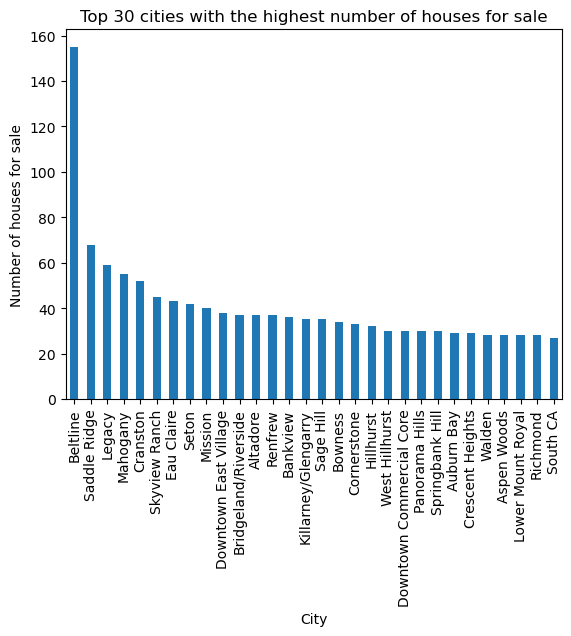

In [18]:
top30_neiborhoods.plot(kind='bar', legend=False)

# Adding x-axis label
plt.xlabel("City")

# Adding y-axis label
plt.ylabel("Number of houses for sale")

# Adding title
plt.title("Top 30 cities with the highest number of houses for sale")

# Showing the plot
plt.show()

In [19]:
# Declare variable `mean_price_by_place`
mean_price_by_place = data.groupby("Place")["Price"].mean().sort_values(ascending = False).round(1)
mean_price_by_place_top30 = mean_price_by_place.head(30)

# Print object type, shape, and head
print("mean_price_by_place type:", type(mean_price_by_place))
print("mean_price_by_place shape:", mean_price_by_place.shape)
mean_price_by_place.head()

mean_price_by_place type: <class 'pandas.core.series.Series'>
mean_price_by_place shape: (299,)


Place
Bel-Aire       3950000.0
Eagle Ridge    3695750.0
Britannia      2966816.7
Elboya         2835400.0
Mayfair        2725000.0
Name: Price, dtype: float64

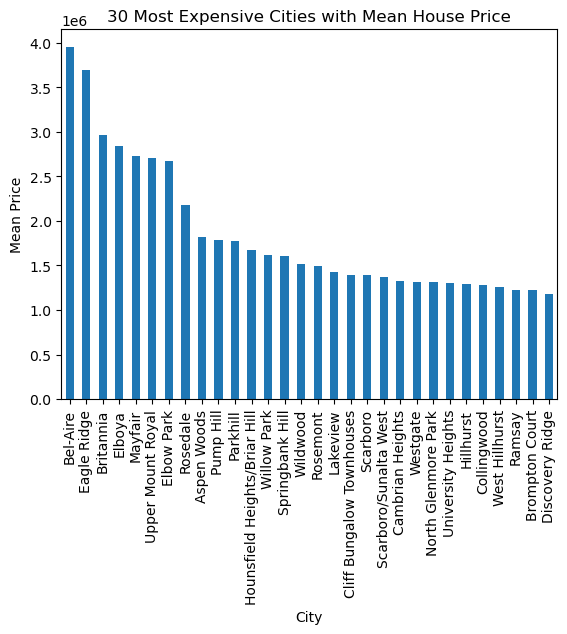

In [20]:
# Finding the Top 30 Most Expensive Neighborhoods in Canada.
mean_price_by_place_top30.plot(
    kind = "bar",
    xlabel = "City",
    ylabel = "Mean Price",
    title = "30 Most Expensive Cities with Mean House Price"
);

In [21]:
data.shape

(3024, 5)

## Predictive Analysis

In [22]:
data

,Price,Place,Beds,Bath,Sq.Ft
0,979999,Glenbrook,4,3.5,1813
1,439900,Mahogany,2,2.0,1029
2,950000,Auburn Bay,4,2.5,2545
3,280000,Beltline,2,2.0,898
4,649000,Spruce Cliff,2,2.0,1482
...,...,...,...,...,...
3352,258000,Beltline,1,1.0,400
3353,319900,Skyview Ranch,2,2.0,837
3354,429900,Skyview Ranch,3,2.0,1275
3357,595000,Sage Hill,3,2.5,1733


In [24]:
data.Place.value_counts().sort_values(ascending=False).head(20)

Place
Beltline                 155
Saddle Ridge              68
Legacy                    59
Mahogany                  55
Cranston                  52
Skyview Ranch             45
Eau Claire                43
Seton                     42
Mission                   40
Downtown East Village     38
Renfrew                   37
Bridgeland/Riverside      37
Altadore                  37
Bankview                  36
Killarney/Glengarry       35
Sage Hill                 35
Bowness                   34
Cornerstone               33
Hillhurst                 32
Panorama Hills            30
Name: count, dtype: int64

### Converting variables - categorical to numerical for Model build

In [23]:
import category_encoders as ce
# Instantiate the encoder
encoder = ce.BinaryEncoder(cols=['Place'])
# Fit and transform the data
df_binary = encoder.fit_transform(data[['Place']])
# Concatenate the encoded DataFrame with the original DataFrame
data_encoded = pd.concat([data, df_binary], axis=1)
# Drop the original 'address' column if needed
data_encoded.drop(columns = ['Place'], axis=1, inplace=True)
data_encoded

,Price,Beds,Bath,Sq.Ft,Place_0,Place_1,Place_2,Place_3,Place_4,Place_5,Place_6,Place_7,Place_8
0,979999,4,3.5,1813,0,0,0,0,0,0,0,0,1
1,439900,2,2.0,1029,0,0,0,0,0,0,0,1,0
2,950000,4,2.5,2545,0,0,0,0,0,0,0,1,1
3,280000,2,2.0,898,0,0,0,0,0,0,1,0,0
4,649000,2,2.0,1482,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3352,258000,1,1.0,400,0,0,0,0,0,0,1,0,0
3353,319900,2,2.0,837,0,0,0,0,1,0,1,1,1
3354,429900,3,2.0,1275,0,0,0,0,1,0,1,1,1
3357,595000,3,2.5,1733,0,0,0,1,1,0,0,1,1


In [26]:
X = data_encoded.drop(columns = ['Price'])
y = data_encoded['Price']
X

,Beds,Bath,Sq.Ft,Place_0,Place_1,Place_2,Place_3,Place_4,Place_5,Place_6,Place_7,Place_8
0,4,3.5,1813,0,0,0,0,0,0,0,0,1
1,2,2.0,1029,0,0,0,0,0,0,0,1,0
2,4,2.5,2545,0,0,0,0,0,0,0,1,1
3,2,2.0,898,0,0,0,0,0,0,1,0,0
4,2,2.0,1482,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3352,1,1.0,400,0,0,0,0,0,0,1,0,0
3353,2,2.0,837,0,0,0,0,1,0,1,1,1
3354,3,2.0,1275,0,0,0,0,1,0,1,1,1
3357,3,2.5,1733,0,0,0,1,1,0,0,1,1


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [28]:
print(X_train.shape)
print(X_test.shape)

(2419, 12)
(605, 12)


### Applying Linear Regression

In [31]:
lr_model = make_pipeline(StandardScaler(), LinearRegression())
lr_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [32]:
lr_model.score(X_test,y_test)

0.5284144969595376

In [33]:
y_pred = lr_model.predict(X_test)

In [35]:
r2_score(y_test,y_pred)*100

52.841449695953756

### Applying Polynomial Regression

In [45]:
from sklearn.preprocessing import PolynomialFeatures
#applying polynomial regression degree 2
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(X_train)
x_test_trans = poly.transform(X_test)

In [46]:
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))

0.6541355303573545


### Applying Random Forest Regression

Feature ranking:
1. Feature 2 (Sq.Ft): 0.8146959968506905
2. Feature 0 (Beds): 0.04857941156496018
3. Feature 1 (Bath): 0.03464640842567055
4. Feature 4 (Place_1): 0.015591783490740368
5. Feature 11 (Place_8): 0.013577323565607887
6. Feature 10 (Place_7): 0.012616019534226437
7. Feature 5 (Place_2): 0.012504217979985
8. Feature 8 (Place_5): 0.012449431553155164
9. Feature 7 (Place_4): 0.012004438168346345
10. Feature 6 (Place_3): 0.011472659362298606
11. Feature 9 (Place_6): 0.011146504690110828
12. Feature 3 (Place_0): 0.0007158048142080821


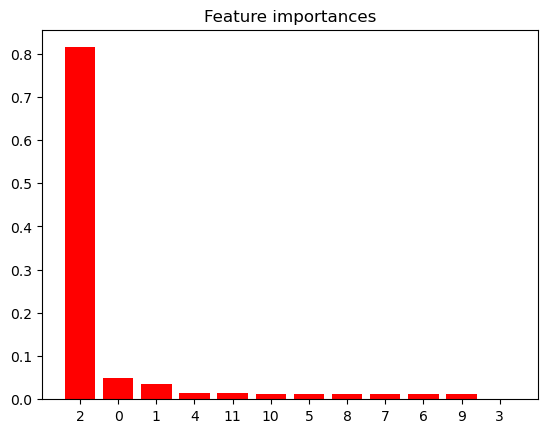

In [39]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the model
model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. Feature {indices[f]} ({X.columns[indices[f]]}): {importances[indices[f]]}")

# Plot feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


In [48]:
# Initialize and train the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
r2_score(y_test, y_pred_rf)*100

62.05529060246431